### Imports

In [34]:
import os
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

%matplotlib inline

### Constants

In [35]:
DATA_DIR = os.path.join("..", "data")
IMAGE_DIR = os.path.join("..", "image")

PLAYERS_DATA_FILEPATH = os.path.join(DATA_DIR, "players.csv")
MMR_DATA_FILEPATH = os.path.join(DATA_DIR, "mmr.csv")
MMR_BY_COUNTRY_FILEPATH = os.path.join(DATA_DIR, "mmr_country.csv")
RANKS_DATA_FILEPATH = os.path.join(DATA_DIR, "mmr_ranks.csv")
TI_PRIZEPOOL_FILEPATH = os.path.join(DATA_DIR, "ti_prizeool.csv")
GAME_ACTIVITY_FILEPATH = os.path.join(DATA_DIR, "game_activity.csv")

### Load Data

- players and teams

In [36]:
df_players = pd.read_csv(PLAYERS_DATA_FILEPATH)
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 21 columns):
team_id                   1078 non-null int64
account_id                1078 non-null int64
country_code              681 non-null object
fantasy_role              1078 non-null int64
full_history_time         811 non-null object
is_pro                    1078 non-null bool
last_login                477 non-null object
last_match_time           1078 non-null object
loccountrycode            709 non-null object
is_locked                 1078 non-null bool
locked_until              0 non-null float64
name                      1078 non-null object
team_name                 932 non-null object
team_last_match_time      387 non-null float64
losses                    387 non-null float64
rating                    387 non-null float64
wins                      387 non-null float64
team_games_played         379 non-null float64
team_wins                 379 non-null float64
is_current_tea

In [37]:
df_players.head()

,team_id,account_id,country_code,fantasy_role,full_history_time,is_pro,last_login,last_match_time,loccountrycode,is_locked,...,name,team_name,team_last_match_time,losses,rating,wins,team_games_played,team_wins,is_current_team_member,mmr_estimate
0,6020739,88470,cn,1,2018-11-08T01:14:19.343Z,True,NaN,2019-07-20T16:38:33.000Z,CN,False,...,TZY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6234
1,6904594,1296625,NaN,2,2018-06-06T15:08:37.244Z,True,2018-12-21T03:12:56.027Z,2019-07-15T03:46:33.000Z,US,True,...,Newsham,TEAM TEAM,1.555684e+09,19.0,1208.64,29.0,44.0,24.0,True,6103
2,7237270,3916428,se,2,2018-10-17T14:37:40.444Z,True,NaN,2019-07-12T14:48:49.000Z,NaN,True,...,Jerry,Bald,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7357
3,7225724,3940262,NaN,2,2018-05-03T08:14:33.014Z,True,NaN,2019-07-10T11:36:28.000Z,NaN,True,...,March,Team Jinesbrus,1.562759e+09,7.0,1123.51,12.0,19.0,12.0,True,7434
4,7247587,4281729,NaN,2,2019-03-30T04:47:36.136Z,True,NaN,2019-07-19T20:13:26.000Z,DK,True,...,syndereN,Anti-MagE-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6355


In [38]:
df_players.isnull().sum()

team_id                      0
account_id                   0
country_code               397
fantasy_role                 0
full_history_time          267
is_pro                       0
last_login                 601
last_match_time              0
loccountrycode             369
is_locked                    0
locked_until              1078
name                         0
team_name                  146
team_last_match_time       691
losses                     691
rating                     691
wins                       691
team_games_played          699
team_wins                  699
is_current_team_member     699
mmr_estimate                 0
dtype: int64

- mmr data

In [39]:
df_mmr = pd.read_csv(MMR_DATA_FILEPATH)
df_mmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
bin               98 non-null int64
bin_name          98 non-null int64
count             98 non-null int64
cumulative_sum    98 non-null int64
dtypes: int64(4)
memory usage: 3.1 KB


In [40]:
df_mmr.head()

,bin,bin_name,count,cumulative_sum
0,0,0,7491,7491
1,1,100,5392,12883
2,2,200,6492,19375
3,3,300,8163,27538
4,4,400,9484,37022


In [41]:
df_mmr.isnull().sum()

bin               0
bin_name          0
count             0
cumulative_sum    0
dtype: int64

- country mmr data

In [42]:
df_mmr_country = pd.read_csv(MMR_BY_COUNTRY_FILEPATH)
df_mmr_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 4 columns):
avg               255 non-null int64
common            255 non-null object
count             255 non-null int64
loccountrycode    254 non-null object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [43]:
df_mmr_country.head()

,avg,common,count,loccountrycode
0,4085,AN,1,AN
1,3554,Singapore,12651,SG
2,3399,Vietnam,14988,VN
3,3389,Denmark,3788,DK
4,3376,Seychelles,140,SC


In [44]:
df_mmr_country.isnull().sum()

avg               0
common            0
count             0
loccountrycode    1
dtype: int64

- rank data

In [45]:
df_rank = pd.read_csv(RANKS_DATA_FILEPATH)
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
bin               50 non-null int64
bin_name          50 non-null int64
count             50 non-null int64
cumulative_sum    50 non-null int64
dtypes: int64(4)
memory usage: 1.6 KB


In [46]:
df_rank.head()

,bin,bin_name,count,cumulative_sum
0,11,11,36,36
1,12,12,251,287
2,13,13,973,1260
3,14,14,3154,4414
4,15,15,7388,11802


In [47]:
df_rank.isnull().sum()

bin               0
bin_name          0
count             0
cumulative_sum    0
dtype: int64

- prizepool data

In [48]:
df_ti_prizepool = pd.read_csv(TI_PRIZEPOOL_FILEPATH)
df_ti_prizepool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
year           9 non-null int64
prize_dolar    9 non-null int64
dtypes: int64(2)
memory usage: 224.0 bytes


In [49]:
df_ti_prizepool.head()

,year,prize_dolar
0,2011,1600000
1,2012,1600000
2,2013,2874380
3,2014,10931105
4,2015,18429613


In [50]:
df_ti_prizepool.isnull().sum()

year           0
prize_dolar    0
dtype: int64

- game activity

In [51]:
df_game_activity = pd.read_csv(GAME_ACTIVITY_FILEPATH)
df_game_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
month               84 non-null object
year                84 non-null int64
average_activity    84 non-null float64
peak_activity       84 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.7+ KB


In [52]:
df_game_activity.head()

,month,year,average_activity,peak_activity
0,June,2019,507528.4,865374.0
1,May,2019,548523.2,997341.0
2,April,2019,520219.0,971545.0
3,March,2019,586505.8,1033925.0
4,February,2019,564909.7,964921.0


In [53]:
df_game_activity.isnull().sum()

month               0
year                0
average_activity    0
peak_activity       0
dtype: int64

### Answering Questions

#### 1. How many players does Dota 2 have?

   - Overall unique player statistic is hard to find online as it can be directly checked in-game. Half year ago counter reached amount of over 11 unique players (https://www.reddit.com/r/DotA2/comments/ank2no/dota_2_has_reached_11_million_unique_players_again/).
    
   ![dota2_screenshot](../images/dota2_player_screenshot.png "Menu")
    
   - By analyzing available on (Steam)[https://store.steampowered.com/] hourly active player statistics it is possible to assess popularity and vitality of the game:

In [54]:
df_game_activity["month_year"] = df_game_activity["month"] + " " + df_game_activity["year"].astype(str)
df_game_activity["month_year"] = pd.to_datetime(df_game_activity["month_year"])
df_game_activity["month_abr"] = df_game_activity["month"].apply(lambda x: x[:3])
df_game_activity["month_abr_year"] = df_game_activity["month_abr"] + " " + df_game_activity["year"].astype(str)
df_game_activity = df_game_activity.sort_values(by="month_year")
df_game_activity.reset_index(drop=True, inplace=True)

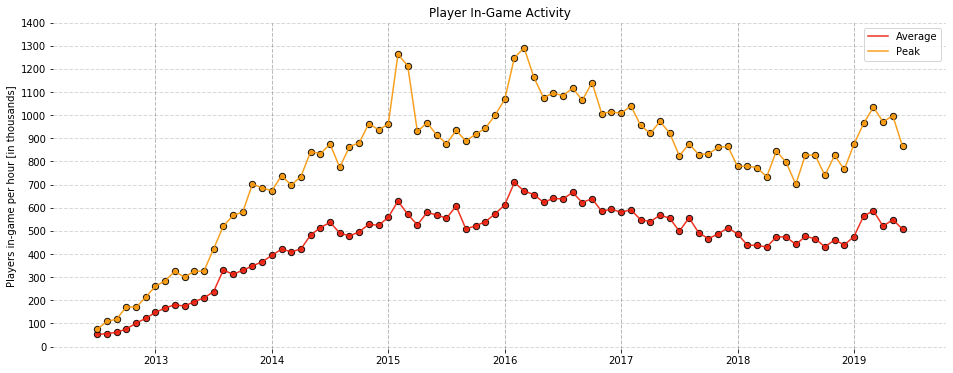

In [55]:
ACTIVITY_GRAPH = os.path.join(IMAGE_DIR, "activity_plot.png")

plt.figure(figsize=(16, 6))

labels = df_game_activity["month_abr_year"].values
x, y = range(0, len(df_game_activity["average_activity"])), df_game_activity["average_activity"] / 1000
x2, y2 = range(0, len(df_game_activity["peak_activity"])), df_game_activity["peak_activity"] / 1000

plt.axvline( 6, color="#444444", lw=1, linestyle="--",  alpha=0.2)
plt.axvline(18, color="#444444", lw=1, linestyle="--",  alpha=0.2)
plt.axvline(30, color="#444444", lw=1, linestyle="--",  alpha=0.2)
plt.axvline(42, color="#444444", lw=1, linestyle="--",  alpha=0.2)
plt.axvline(54, color="#444444", lw=1, linestyle="--",  alpha=0.2)
plt.axvline(66, color="#444444", lw=1, linestyle="--",  alpha=0.2)
plt.axvline(78, color="#444444", lw=1, linestyle="--",  alpha=0.2)

plt.scatter(x, y, edgecolor="black", linewidth="1", s=40, alpha=0.9, c="#eb1c09")
plt.scatter(x2, y2, edgecolor="black", linewidth="1", s=40, alpha=0.9, c="#f79605")

plt.plot(y, alpha=0.9, c="#eb1c09", label="Average")
plt.plot(y2, alpha=0.9, c="#f79605", label="Peak",)

plt.ylabel("Players in-game per hour [in thousands]")
plt.legend(loc="upper right")
plt.yticks(np.arange(0, 1500, 100))
plt.xticks([6, 18, 30, 42, 54, 66, 78], 
           ["2013", "2014", "2015", "2016", "2017", "2018", "2019"])
plt.title("Player In-Game Activity")

plt.grid(c="#444444", linestyle='--', linewidth=1, alpha=0.2)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False);

plt.savefig(ACTIVITY_GRAPH, dpi=200, bbox_inches="tight")

It is possible to observe that average amount of players online has been raising over first two and half years of game release. Since that moment it holds on the same level of around 500 thousands of players online players per hour. The game vitality seems preety stable and lately started sligtly rising what can be explained by upcoming world championship TI 2019 in August 2019. Furthermore the game has introduced Battle Pass in May, which allows players to grind additional in-game bonuses by completing prepared subtasks and quests.

#### - What is average MMR of Dota 2 player?

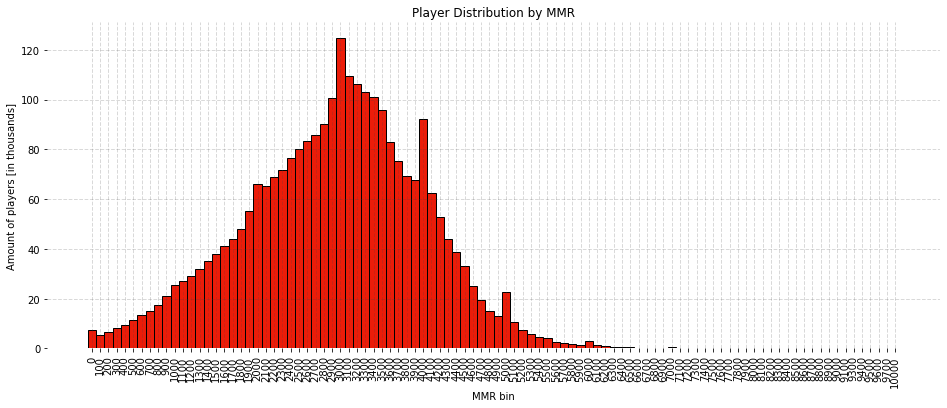

In [56]:
MMR_GRAPH = os.path.join(IMAGE_DIR, "mmr.png")

plt.figure(figsize=(16, 6))

labels = df_mmr["bin_name"].values
x, y = range(0, len(df_mmr["count"])), df_mmr["count"] / 1000

plt.bar(x, y, edgecolor="black", linewidth="1", width=1.0, color="#eb1c09")

plt.ylabel("Amount of players [in thousands]")
plt.xlabel("MMR bin")
plt.xticks(x, labels, rotation="vertical")
plt.title("Player Distribution by MMR")

plt.grid(c="#444444", linestyle='--', linewidth=1, alpha=0.2)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False);

plt.savefig(MMR_GRAPH, dpi=200, bbox_inches="tight")

Graph shows the MMR distribution in player group which decided to play Ranked Match mode. Interesting observation in this graph are peaks at mmr values such as 3000, 4000, 5000 and also small peaks at 2000 and 6000. This is most likely caused by the fact that people tend to climb the ladder and they set those "complete" numbers as their final goals. It is very unlikely and hard to improve the personal ranking over 2000 points in one season.

In [57]:
average_mmr = (np.sum(df_mmr["count"] * df_mmr["bin_name"])) / df_mmr["count"].sum()
average_mmr

2930.1472430050067

#### - How does it compare to in-game divisions/ranks?

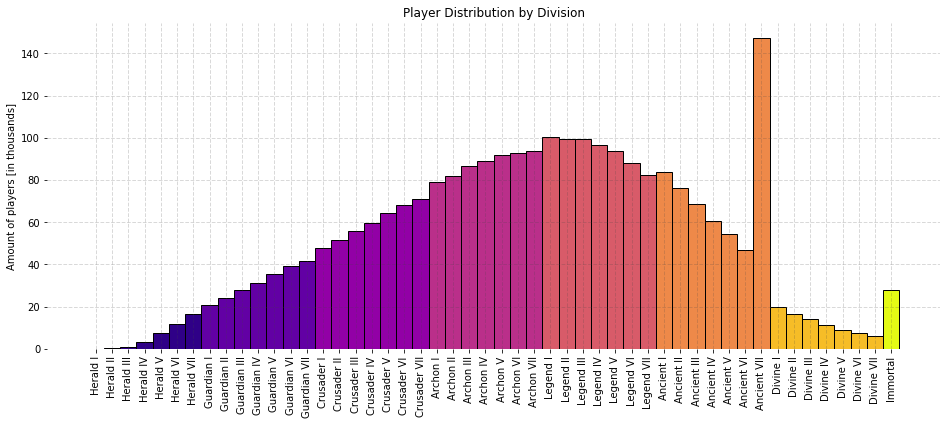

In [58]:
RANKS_GRAPH = os.path.join(IMAGE_DIR, "ranks.png")

plt.figure(figsize=(16, 6))

# taken from game
ranks = ["Herald", "Guardian", "Crusader", "Archon",
         "Legend", "Ancient", "Divine", "Immortal"]

def _rank_name_generator(name):
    roman_numbers = ["I", "II", "III", "IV", "V", "VI", "VII"]
    return ["{} {}".format(name, n) for n in roman_numbers]

labels = []
for rank in ranks:
    if rank == "Immortal":
        labels.append(rank)
    else:
        labels.extend(_rank_name_generator(rank))

color_map = np.array([(47,0,135), (98,0,164), (146,0,166), (186,47,138), 
             (216,91,105), (238,137,73), (246,189,39), (228,250,21)]) / 255.0

x, y = range(0, len(df_rank["count"])), df_rank["count"] / 1000

for i, color in zip(range(0, 7*len(labels), 7), color_map):
    plt.bar(x[i:i+7], y[i:i+7], edgecolor="black", linewidth="1", width=1.0, color=color)
    
plt.ylabel("Amount of players [in thousands]")
plt.xticks(x, labels, rotation="vertical")
plt.title("Player Distribution by Division")

plt.grid(c="#444444", linestyle='--', linewidth=1, alpha=0.2)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False);

plt.savefig(RANKS_GRAPH, dpi=200, bbox_inches="tight")

The same MMR distribution can be translated to 8 ingame divisions, where each divisions has 7 separate level. Highest division called "Immortal" is for players that have achieved very high score and top 1000 places in ranking is displayed on the division herb.

In general each player has two kind of MMR scores - solo and team. Player division is decided based on highest MMR value.

The visible accumulation of players at Ancient VII is caused by the fact, that players cannot reach Divine division through team MMR. It has to be done alone, only through playing Solo Rank Matches.

#### - How many players play rankeds and how many of them are professional players?

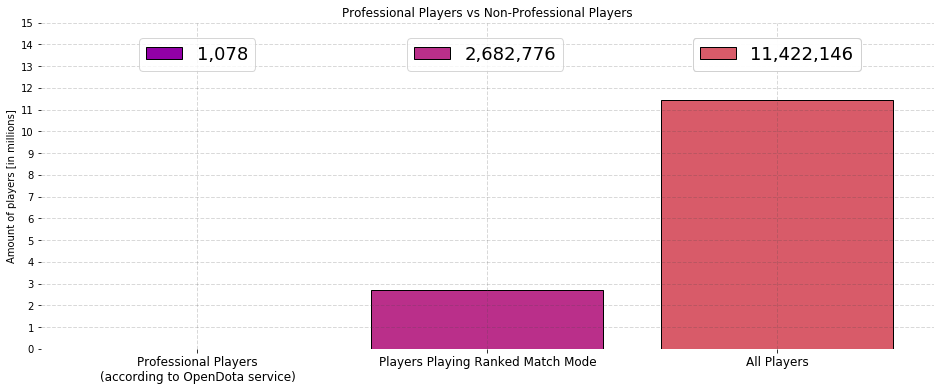

In [59]:
PLAYER_COUNT_GRAPH = os.path.join(IMAGE_DIR, "player_count.png")

plt.figure(figsize=(16, 6))

labels = ["Professional Players\n(according to OpenDota service)", 
          "Players Playing Ranked Match Mode", 
          "All Players\n"]

color_map = np.array([(146,0,166), (186,47,138), (216,91,105)]) / 255.0
                                  
y = np.array([df_players.shape[0], df_mmr["count"].sum(), 11422146])
y_scaled = y / 1000**2
x = range(0, len(y))

for i, color in zip(x, color_map):
    plt.bar([x[i]], [y_scaled[i]], edgecolor="black", linewidth="1", width=0.8, color=color)
    
plt.grid(c="#444444", linestyle='--', linewidth=1, alpha=0.2)
plt.xticks(x, labels, fontsize=12)
plt.ylabel("Amount of players [in millions]")
plt.yticks(np.arange(0, 16, 1))
plt.title("Professional Players vs Non-Professional Players")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False);

for val, color, anchor in zip(y, color_map, [(0.1, 0.98), (0.4, 0.98), (0.72, 0.98)]):
    patch = Patch(facecolor=color, edgecolor="black", label="{val:,}".format(val=val))
    legend = plt.legend(handles=[patch], loc="upper left", bbox_to_anchor=anchor, fontsize=18)
    plt.gca().add_artist(legend)

plt.savefig(PLAYER_COUNT_GRAPH, dpi=200, bbox_inches="tight")

In [76]:
complete_teams_num = (df_players.groupby("team_name")["account_id"].nunique() >= 5).sum()
complete_teams_num

83

In [60]:
921/11422146

8.063283379498039e-05

In [61]:
921/268776

0.003426645236181802

Professional players are 0.003% of all ranking players.

#### - What is average MMR of professional player?

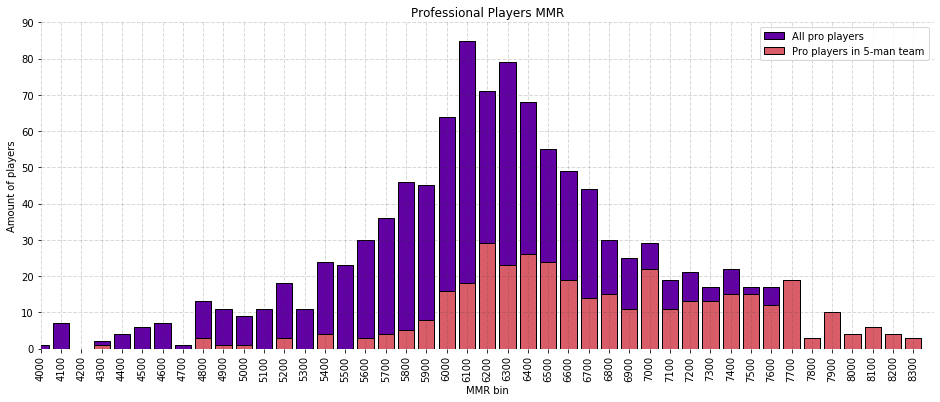

In [62]:
PRO_PLAYERS_MMR_GRAPH = os.path.join(IMAGE_DIR, "pro_player_mmr.png")

df_players_with_mmr = df_players.dropna(subset=["mmr_estimate"]).copy()
df_players_with_mmr["mmr_estimate_bin"] = (df_players_with_mmr["mmr_estimate"] / 100).astype(int) * 100

criteria_in_team = df_players_with_mmr["is_current_team_member"] == True
df_players_in_team = df_players_with_mmr.loc[criteria_in_team].copy()
df_players_in_team["mmr_estimate_bin"] = (df_players_in_team["mmr_estimate"] / 100).astype(int) * 100

players_with_mmr = df_players_with_mmr["mmr_estimate_bin"].value_counts().to_dict()
players_in_team = df_players_in_team["mmr_estimate_bin"].value_counts().to_dict()

labels = np.arange(0, df_players_with_mmr["mmr_estimate_bin"].max() + 100, 100)
x = np.arange(0, len(labels), 1)
y1 = [(players_with_mmr[label] if label in players_with_mmr else 0) for label in labels]
y2 = [(players_in_team[label] if label in players_in_team else 0) for label in labels]

plt.figure(figsize=(16, 6))
plt.bar(x, y1, width=0.8, edgecolor="black", linewidth="1", 
        color=(0.38, 0.0, 0.64), label="All pro players")

plt.bar(x, y2, width=0.8, edgecolor="black", linewidth="1", 
        color=(0.85, 0.36, 0.41), label="Pro players in 5-man team")

plt.grid(c="#444444", linestyle='--', linewidth=1, alpha=0.2)
plt.ylabel("Amount of players")
plt.xlabel("MMR bin")
plt.xticks(x, labels, rotation="vertical")
plt.yticks(range(0, 100, 10))
plt.xlim(40, 84)
plt.title("Professional Players MMR")
plt.legend()

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False);

plt.savefig(PRO_PLAYERS_MMR_GRAPH, dpi=200, bbox_inches="tight")

In [63]:
df_players_in_team["mmr_estimate"].mean()

6800.868073878628

In [64]:
criteria = ~df_players_with_mmr["account_id"].isin(df_players_in_team["account_id"])
df_players_with_mmr.loc[criteria, "mmr_estimate"].mean()

6032.586552217454

Average MMR of professional player is 6095. It is almost two times higher than average MMR of average Dota 2 player. Definition of when someone can be called professional player is unclear. There are players that earn money by teaching others to play Dota via couching sessions or streaming. Those people could be called professionals because they earn money by playing the game. It seems that for OpenDota, player is tagged as professional if he played in tournament that offers larger money prize. Still within a group of all professional players listed by OpenDota, not everyone are currently a part of complete 5-man team. Those who are currently active seems to have higher average MMR of 6967.625. 

#### - What are professional player earnings?

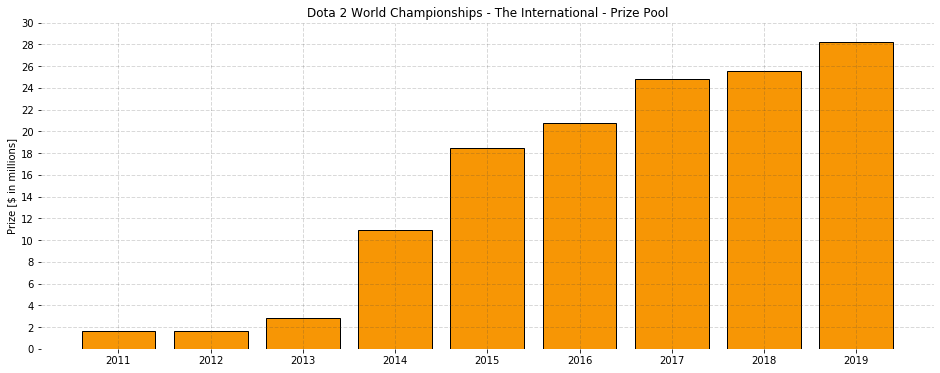

In [65]:
TI_PRIZEPOOL_GRAPH = os.path.join(IMAGE_DIR, "ti_prizepool.png")

plt.figure(figsize=(16, 6))

labels = df_ti_prizepool["year"].values
x, y = range(0, len(df_ti_prizepool["prize_dolar"])), df_ti_prizepool["prize_dolar"] / 1000**2

plt.bar(x, y, edgecolor="black", linewidth="1", width=0.8, color="#f79605")

plt.ylabel("Prize [$ in millions]")
plt.yticks(np.arange(0, 31, 2))
plt.xticks(x, labels)
plt.title("Dota 2 World Championships - The International - Prize Pool")

plt.grid(c="#444444", linestyle='--', linewidth=1, alpha=0.2)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False);

plt.savefig(TI_PRIZEPOOL_GRAPH, dpi=200, bbox_inches="tight")

In [66]:
prizepool_growth_yearly = np.diff(y[1:])
print("Average growth: {}".format(np.median(prizepool_growth_yearly)))

Average growth: 2.6678439999999988
